# Import Libraries

In [2]:
import talib
import quandl

# Download Financial Data

In [3]:
data = quandl.get("WIKI/NVDA")

In [4]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [5]:
data

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1999-01-22,21.00,23.44,18.630,19.69,5655600.0,0.0,1.0,1.623824,1.812497,1.440564,1.522529,67867200.0
1999-01-25,21.25,22.00,19.690,21.75,1063500.0,0.0,1.0,1.643156,1.701149,1.522529,1.681818,12762000.0
1999-01-26,22.00,22.44,19.750,20.06,715000.0,0.0,1.0,1.701149,1.735172,1.527168,1.551139,8580000.0
1999-01-27,20.13,20.63,19.000,20.00,509100.0,0.0,1.0,1.556552,1.595214,1.469174,1.546499,6109200.0
1999-01-28,20.00,20.13,19.810,19.94,474000.0,0.0,1.0,1.546499,1.556552,1.531808,1.541860,5688000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,249.32,252.00,247.330,248.56,10841782.0,0.0,1.0,249.320000,252.000000,247.330000,248.560000,10841782.0
2018-03-22,246.00,247.88,240.341,241.85,13663927.0,0.0,1.0,246.000000,247.880000,240.341000,241.850000,13663927.0
2018-03-23,242.40,242.67,232.520,232.97,18225390.0,0.0,1.0,242.400000,242.670000,232.520000,232.970000,18225390.0


# Import Financial Data Plotting Library: mplfinance

In [18]:
import mplfinance as mpf

C:\Users\Rosie\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


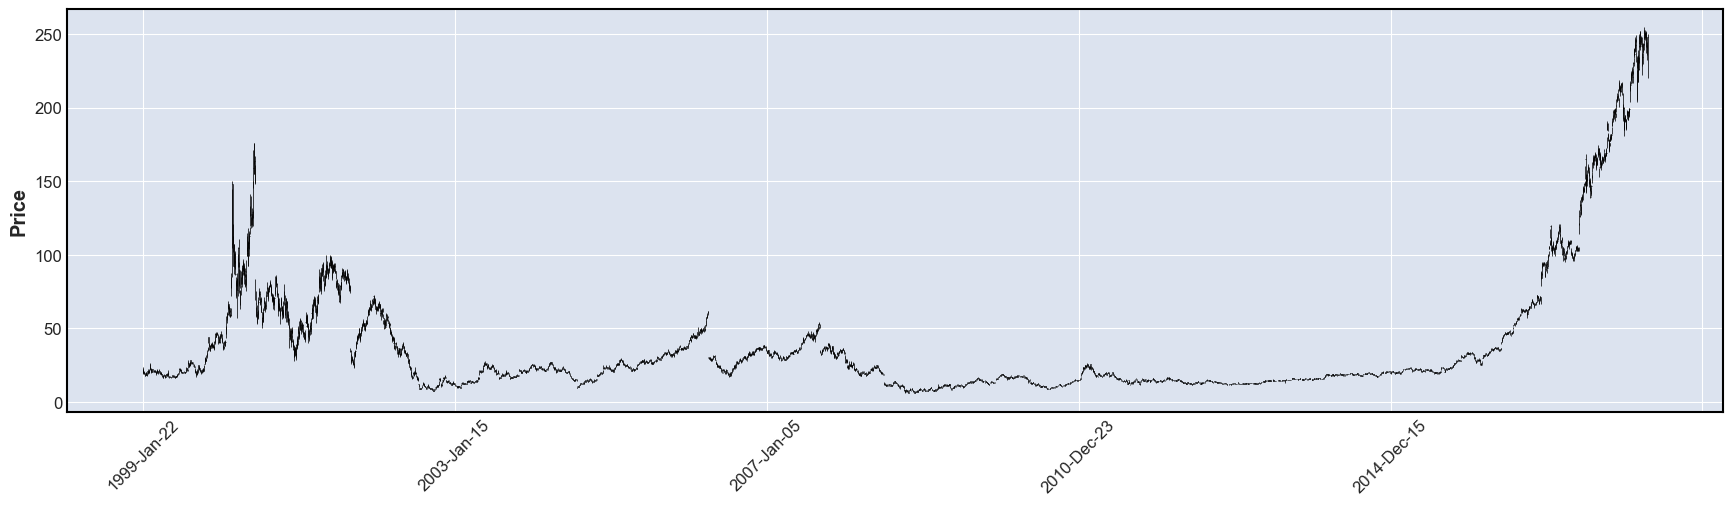

In [30]:
mpf.plot(data, figratio=(16,4))

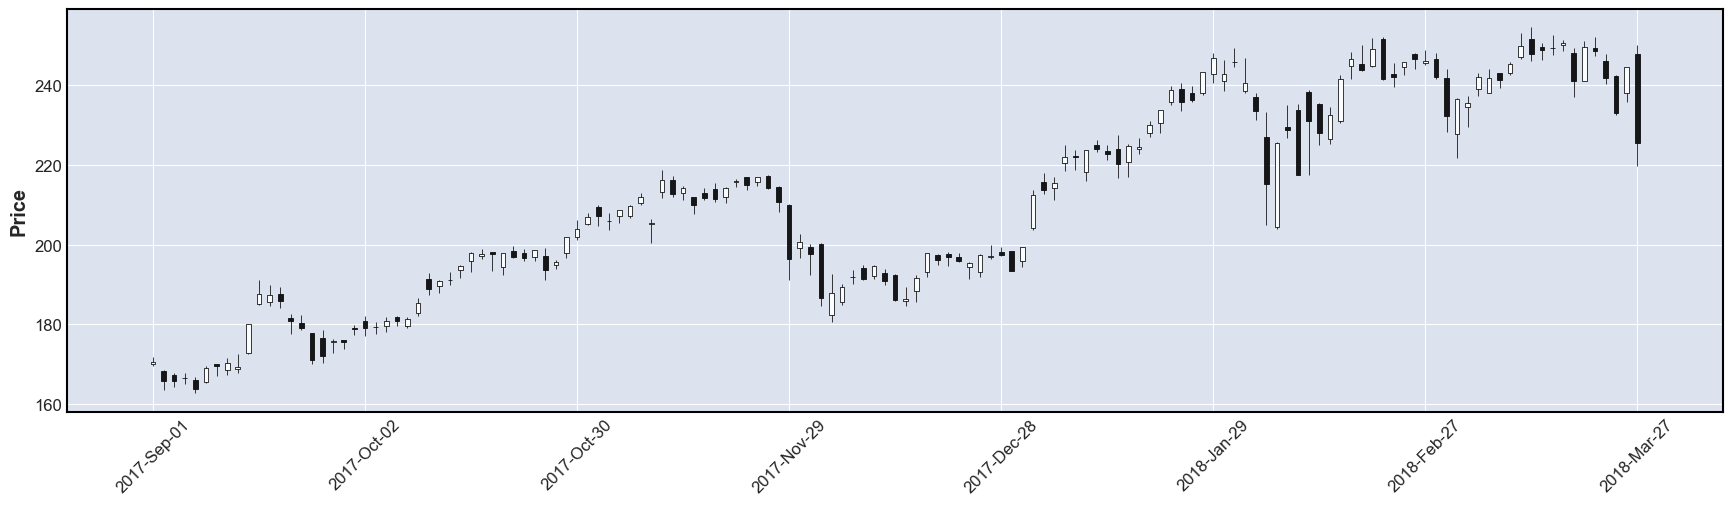

In [32]:
mpf.plot(data.loc['2017-09-01':], type='candle', figratio=(16,4))

# Make a Copy of the Original Dataframe and Customize It

In [6]:
df = data.copy()
df.drop(axis=1, columns=["Open","High","Low","Close","Volume", "Ex-Dividend", "Split Ratio"], inplace=True)
df.rename(columns={"Adj. Open":"open", "Adj. High":"high", "Adj. Low":"low", "Adj. Close":"close", "Adj. Volume":"volume"},inplace=True)

In [7]:
df

,open,high,low,close,volume
Date,,,,,
1999-01-22,1.623824,1.812497,1.440564,1.522529,67867200.0
1999-01-25,1.643156,1.701149,1.522529,1.681818,12762000.0
1999-01-26,1.701149,1.735172,1.527168,1.551139,8580000.0
1999-01-27,1.556552,1.595214,1.469174,1.546499,6109200.0
1999-01-28,1.546499,1.556552,1.531808,1.541860,5688000.0
...,...,...,...,...,...
2018-03-21,249.320000,252.000000,247.330000,248.560000,10841782.0
2018-03-22,246.000000,247.880000,240.341000,241.850000,13663927.0
2018-03-23,242.400000,242.670000,232.520000,232.970000,18225390.0


# Use TA-Lib Library to Recognise Candlestick Patterns

In [8]:
ms = talib.CDLMORNINGSTAR(df['open'], df['high'], df['low'], df['close'])
egf = talib.CDLENGULFING(df['open'], df['high'], df['low'], df['close'])
hammer = talib.CDLHAMMER(df['open'], df['high'], df['low'], df['close'])
hm = talib.CDLHANGINGMAN(df['open'], df['high'], df['low'], df['close'])

In [9]:
ms[ms != 0]

Date
2000-02-29    100
2000-05-22    100
2000-12-08    100
2002-02-25    100
2002-10-10    100
2003-01-28    100
2003-08-27    100
2004-01-26    100
2006-10-04    100
2007-08-17    100
2008-03-18    100
2008-08-05    100
2008-10-13    100
2009-04-22    100
2009-06-09    100
2009-10-19    100
2011-05-18    100
2013-02-22    100
2014-07-09    100
2014-10-08    100
2014-12-17    100
2015-06-16    100
2015-07-28    100
2015-08-07    100
2015-12-21    100
2017-08-14    100
dtype: int32

In [10]:
egf[egf != 0]

Date
1999-01-26   -100
1999-02-08   -100
1999-02-19    100
1999-03-16   -100
1999-03-22   -100
             ... 
2018-01-10    100
2018-01-24   -100
2018-02-21   -100
2018-02-28   -100
2018-03-27   -100
Length: 377, dtype: int32

In [11]:
hammer[hammer != 0]

Date
1999-05-28    100
1999-07-20    100
1999-07-21    100
1999-07-27    100
1999-09-02    100
             ... 
2017-01-11    100
2017-01-12    100
2017-03-03    100
2017-05-25    100
2017-12-22    100
Length: 91, dtype: int32

In [12]:
hm[hm != 0]

Date
1999-05-28   -100
1999-06-28   -100
1999-07-06   -100
1999-11-12   -100
2000-02-04   -100
             ... 
2017-09-28   -100
2017-11-03   -100
2017-12-20   -100
2018-02-23   -100
2018-02-26   -100
Length: 92, dtype: int32

# Display the Results of Candlestick Patterns 

In [13]:
print("Total trading days: {}".format(df["open"].count()))
print("Morning Stars appeared: {} times".format(ms[ms!=0].count()))
print("Engulfing Patterns appeared: {} times".format(egf[egf!=0].count()))
print("Hammers appeared: {} times".format(hammer[hammer!=0].count()))
print("Hanging Men appeared: {} times".format(hm[hm!=0].count()))    

Total trading days: 4825
Morning Stars appeared: 26 times
Engulfing Patterns appeared: 377 times
Hammers appeared: 91 times
Hanging Men appeared: 92 times


# Store the Results in the Copied Dataframe 

In [14]:
df['morning_star'] = ms
df['engulfing'] = egf
df['hammer'] = hammer
df['hanging_man'] = hm

In [15]:
df

,open,high,low,close,volume,morning_star,engulfing,hammer,hanging_man
Date,,,,,,,,,
1999-01-22,1.623824,1.812497,1.440564,1.522529,67867200.0,0,0,0,0
1999-01-25,1.643156,1.701149,1.522529,1.681818,12762000.0,0,0,0,0
1999-01-26,1.701149,1.735172,1.527168,1.551139,8580000.0,0,-100,0,0
1999-01-27,1.556552,1.595214,1.469174,1.546499,6109200.0,0,0,0,0
1999-01-28,1.546499,1.556552,1.531808,1.541860,5688000.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2018-03-21,249.320000,252.000000,247.330000,248.560000,10841782.0,0,0,0,0
2018-03-22,246.000000,247.880000,240.341000,241.850000,13663927.0,0,0,0,0
2018-03-23,242.400000,242.670000,232.520000,232.970000,18225390.0,0,0,0,0


# Plot Financial Data